# On Multiple Linear Regression - Codealong

In [1]:
import pandas as pd
import numpy as np

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

## Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continua. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. Recall e.g. the heart-disease dataset from Kaggle in which the target variable took values 0-4, each representing a different stage of heart disease.

### Ordinal Mapping
If we have our data in Series or Data Frames, we can convert these categories to numbers using pandas Series’ astype method and specify ‘category’.


In [12]:
df = pd.DataFrame({'vertebrates': ['Bird', 'Bird', 'Mammal', 'Fish', 'Amphibian', 'Reptile', 'Mammal'], 'count':[1,2,3,4,5,6,7]})

#df.vertebrates.astype("category").cat.codes
pd.get_dummies(df,prefix="vertebrates_custom")

,count,vertebrates_custom_Amphibian,vertebrates_custom_Bird,vertebrates_custom_Fish,vertebrates_custom_Mammal,vertebrates_custom_Reptile
0,1,0,1,0,0,0
1,2,0,1,0,0,0
2,3,0,0,0,1,0
3,4,0,0,1,0,0
4,5,1,0,0,0,0
5,6,0,0,0,0,1
6,7,0,0,0,1,0


You can always pass the types of vertebrates in separately so you have a record of the labels to match the categories.

Any missing categories in this case will be represented by -1


In [3]:
ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']

df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})
df

,satisfaction
0,Mad
1,Happy
2,Unhappy
3,Neutral


In [4]:
df.satisfaction.astype("category",
  ordered=True,
  categories=ordered_satisfaction
)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


0        NaN
1      Happy
2    Unhappy
3    Neutral
Name: satisfaction, dtype: category
Categories (5, object): [Very Unhappy < Unhappy < Neutral < Happy < Very Happy]

### Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_. We'll do this below in our air safety dataset where we have a column of airline names.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [6]:
pd.get_dummies(df)

,satisfaction_Happy,satisfaction_Mad,satisfaction_Neutral,satisfaction_Unhappy
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0


In [5]:
chars = pd.read_csv('../pandas-2/ds_chars.csv', index_col=0)

FileNotFoundError: [Errno 2] File b'../pandas-2/ds_chars.csv' does not exist: b'../pandas-2/ds_chars.csv'

In [ ]:
# Let's try using pd.get_dummies() to create our dummy columns:
state_dums = pd.get_dummies(chars['home_state'])
state_dums
# We could also have used LabelBinarizer from sklearn.preprocessing


# Now we need to add these dummy columns to our original dataset:

chars_states = pd.concat([chars, state_dums], axis=1)
chars_states

## Drug Use Dataset

In [13]:
drugs = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')

In [14]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [15]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [16]:
drugs['age'] = drugs['age'].map(int)

ValueError: invalid literal for int() with base 10: '22-23'

What happened?

In [17]:
# Let's take a closer look at this 'age' column:

drugs['age'][:15]

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
Name: age, dtype: object

In [18]:
drugs = drugs.head(10)
drugs['age'] = drugs['age'].map(int)
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [19]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 28 columns):
age                        10 non-null int64
n                          10 non-null int64
alcohol-use                10 non-null float64
alcohol-frequency          10 non-null float64
marijuana-use              10 non-null float64
marijuana-frequency        10 non-null float64
cocaine-use                10 non-null float64
cocaine-frequency          10 non-null object
crack-use                  10 non-null float64
crack-frequency            10 non-null object
heroin-use                 10 non-null float64
heroin-frequency           10 non-null object
hallucinogen-use           10 non-null float64
hallucinogen-frequency     10 non-null float64
inhalant-use               10 non-null float64
inhalant-frequency         10 non-null object
pain-releiver-use          10 non-null float64
pain-releiver-frequency    10 non-null float64
oxycontin-use              10 non-null float64
oxycontin-fre

## Model Selection

Let's imagine that I'm going to try to predict age based on factors to do with drug use.

Now: Which columns (predictors) should I choose? Even ignoring the non-numeric categories in my dataset, there are still 20 predictors I could choose! For each of these predictors, I could either use it or not use it in my model, which means that there are 2^20 = 1,048,576 different models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 1,048,575 models from which I can choose!

How can I decide which predictors to use in my model?

### Correlation

In [20]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

drugs.corr()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
age,1.000000,-0.678098,0.996314,0.931186,0.953243,0.953146,0.961795,0.900670,0.846138,0.928213,...,0.949312,-0.468873,0.896295,0.923914,-0.617885,0.990516,0.572547,0.884185,0.602577,-0.553770
n,-0.678098,1.000000,-0.645256,-0.843222,-0.564902,-0.743373,-0.818286,-0.900995,-0.843173,-0.726954,...,-0.570169,-0.023431,-0.491546,-0.618209,0.160447,-0.645540,-0.166993,-0.491399,-0.202063,0.344435
alcohol-use,0.996314,-0.645256,1.000000,0.909760,0.965123,0.943835,0.951821,0.881746,0.815320,0.930178,...,0.956612,-0.455398,0.910584,0.927776,-0.606912,0.990831,0.550768,0.873142,0.610827,-0.566980
alcohol-frequency,0.931186,-0.843222,0.909760,1.000000,0.806100,0.873747,0.973015,0.949598,0.930235,0.841229,...,0.805438,-0.219918,0.723472,0.808140,-0.385095,0.908335,0.445975,0.799919,0.441897,-0.524055
marijuana-use,0.953243,-0.564902,0.965123,0.806100,1.000000,0.955016,0.901698,0.831298,0.745564,0.963083,...,0.992673,-0.535730,0.982970,0.974045,-0.635250,0.967005,0.542347,0.876430,0.685024,-0.614406
marijuana-frequency,0.953146,-0.743373,0.943835,0.873747,0.955016,1.000000,0.938108,0.919217,0.842248,0.981315,...,0.958056,-0.525123,0.923595,0.952827,-0.653125,0.947274,0.550307,0.842459,0.603117,-0.545288
cocaine-use,0.961795,-0.818286,0.951821,0.973015,0.901698,0.938108,1.000000,0.969399,0.916188,0.933253,...,0.903648,-0.272339,0.844949,0.908581,-0.424717,0.960619,0.435096,0.856860,0.567486,-0.589959
crack-use,0.900670,-0.900995,0.881746,0.949598,0.831298,0.919217,0.969399,1.000000,0.953778,0.903950,...,0.844720,-0.215340,0.786092,0.875314,-0.386389,0.896219,0.354443,0.794118,0.548061,-0.441970
heroin-use,0.846138,-0.843173,0.815320,0.930235,0.745564,0.842248,0.916188,0.953778,1.000000,0.800873,...,0.769350,-0.182315,0.716452,0.818171,-0.333852,0.843893,0.449558,0.811224,0.558059,-0.424646
hallucinogen-use,0.928213,-0.726954,0.930178,0.841229,0.963083,0.981315,0.933253,0.903950,0.800873,1.000000,...,0.961987,-0.433514,0.938238,0.955652,-0.561606,0.936640,0.439060,0.811884,0.611513,-0.612683


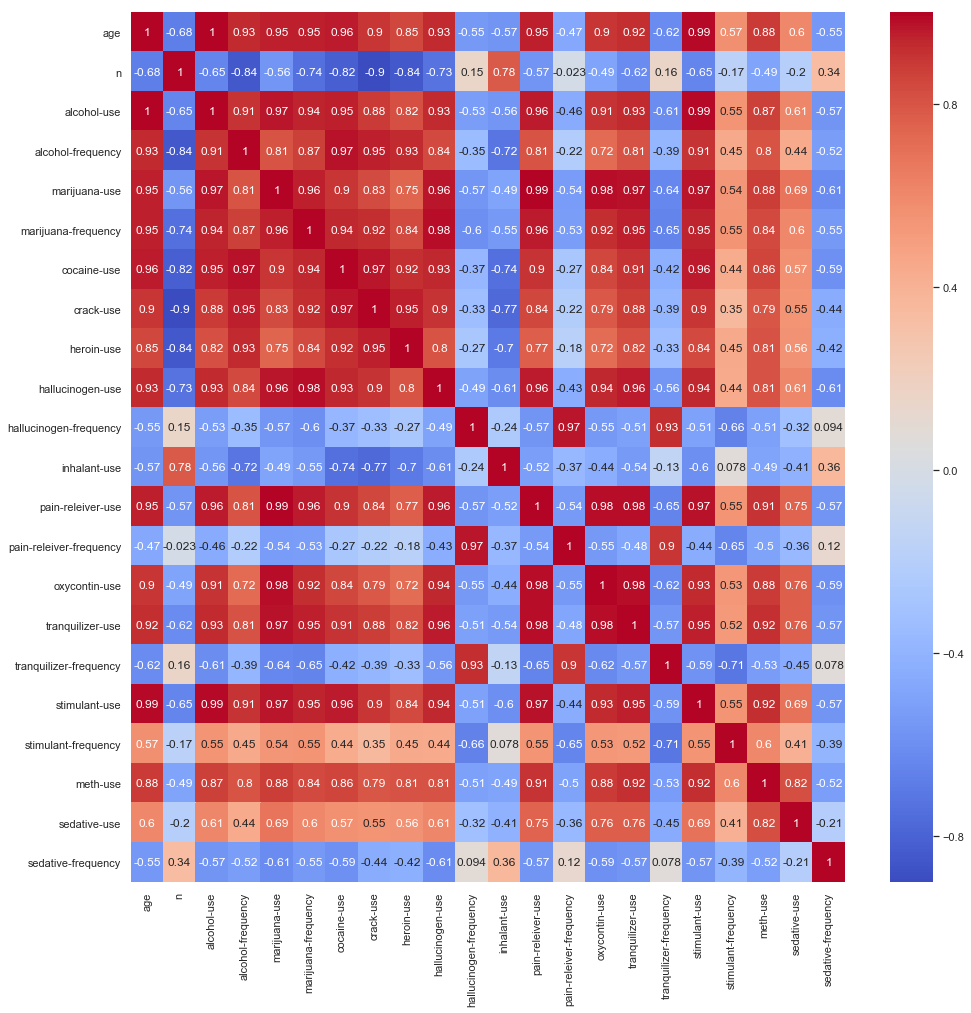

In [24]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(16, 16)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(drugs.corr(), annot=True, cmap='coolwarm');

In [ ]:
# Let's look at the correlations with 'age'
# (our dependent variable) in particular.

drugs.corr()

In [25]:
X = drugs[['alcohol-use', 'tranquilizer-frequency', 'stimulant-use']]
y = drugs['age']

### Multicollinearity

Probably 'alcohol-use' and 'alcohol-frequency' are highly correlated _with each other_ as well as with 'age'. This can lead to the production of an _overfit_ model. We'll stick a pin in this and return to the issue of overfit models soon.

## Multiple Regression in StatsModels

In [26]:
import statsmodels.api as sm

In [27]:
predictors = np.asarray(X)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y, predictors_int).fit()
model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     313.4
Date:                Wed, 01 May 2019   Prob (F-statistic):           5.56e-07
Time:                        10:53:11   Log-Likelihood:                0.56286
No. Observations:                  10   AIC:                             6.874
Df Residuals:                       6   BIC:                             8.085
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9549      0.306     39.070      0.000      11.206      12.704
x1             0.0870      0.028      3.149      0.020       0.019       0.155
x2            -0.0052      0.008     -0.620      0.558      -0.026       0.015
x3             0.4206      0.502      0.837      0.435      -0.809       1.650
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.472
Skew:                          -0.009   Prob(JB):                        0.790
Kurtosis:                       1.936   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
predictors = np.asarray(X)
predictors_int = sm.add_constant(X)
model = sm.OLS(np.asarray(y), predictors_int).fit()
model.summary()


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     313.4
Date:                Wed, 01 May 2019   Prob (F-statistic):           5.56e-07
Time:                        10:53:15   Log-Likelihood:                0.56286
No. Observations:                  10   AIC:                             6.874
Df Residuals:                       6   BIC:                             8.085
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.9549      0.306     39.070      0.000      11.206      12.704
alcohol-use                0.0870      0.028      3.149      0.020       0.019       0.155
tranquilizer-frequency    -0.0052      0.008     -0.620      0.558      -0.026       0.015
stimulant-use              0.4206      0.502      0.837      0.435      -0.809       1.650
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.472
Skew:                          -0.009   Prob(JB):                        0.790
Kurtosis:                       1.936   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""